In [2]:
#P4 module 1 - FINANCIAL DATA PIPELINE
# DAY 1 : PULL BOND DATA FROM YFINANCE

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

print("LIBRARIES IMPORTED SUCCESSFULLY!")
print(f"Today's date : {datetime.now().strftime('%Y-%m-%d')}")

LIBRARIES IMPORTED SUCCESSFULLY!
Today's date : 2026-02-18


In [3]:
# Pull US Treasury Bond ETF data (TLT - 20+ Year Treasury)
# This represents bond market data

print("Fetching bond data...")

bond_ticker = yf.Ticker("TLT")
bond_data = bond_ticker.history(period="1y")  # Last 1 year of data

print(f"\nData pulled successfully!")
print(f"Total rows: {len(bond_data)}")
print(f"\nFirst 5 rows:")
print(bond_data.head())

Fetching bond data...

Data pulled successfully!
Total rows: 251

First 5 rows:
                                Open       High        Low      Close  \
Date                                                                    
2025-02-18 00:00:00-05:00  84.745663  85.032802  84.267090  84.324516   
2025-02-19 00:00:00-05:00  84.180950  84.659522  84.123523  84.429810   
2025-02-20 00:00:00-05:00  84.659542  84.956263  84.659542  84.745689   
2025-02-21 00:00:00-05:00  85.061543  86.076115  85.013683  85.769829   
2025-02-24 00:00:00-05:00  85.501832  86.200545  85.434833  86.018692   

                             Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                         
2025-02-18 00:00:00-05:00  29429200        0.0           0.0            0.0  
2025-02-19 00:00:00-05:00  20584300        0.0           0.0            0.0  
2025-02-20 00:00:00-05:00  27913400        0.0           0.0            0.0  
2025-02-21 00:00:0

DATASET INFO:
DATERANGE:2025-02-18 00:00:00-05:00) to 2026-02-17 00:00:00-05:00

columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Capital Gains']

basic statistics:
count    251.000000
mean      86.370207
std        2.089592
min       81.211990
25%       84.697681
50%       86.798302
75%       87.916412
max       90.700958
Name: Close, dtype: float64


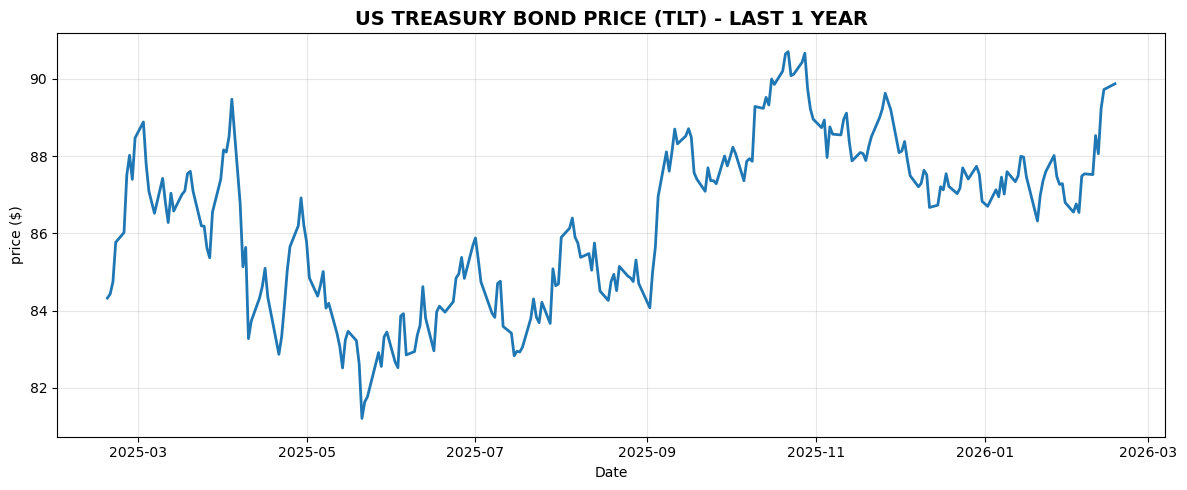


 bond data visualized successfully!


In [6]:
# explore the bond data

print("DATASET INFO:")
print(f"DATERANGE:{bond_data.index[0]}) to {bond_data.index[-1]}")
print(f"\ncolumns: {list(bond_data.columns)}")
print(f"\nbasic statistics:")
print(bond_data['Close'].describe())

#plot the bond price trend 
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(bond_data.index, bond_data['Close'],linewidth=2)
plt.title('US TREASURY BOND PRICE (TLT) - LAST 1 YEAR', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('price ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n bond data visualized successfully!")

In [8]:
#pull multiple bond tickers for comparison 
#TLT = LONG-TERM TREASURY , IEF = MID-TERM, SHY=SHORT-TERM

print("Fetching multiple bond datasets ...")

tickers=['TLT','IEF','SHY']
bond_prices = {}

for ticker in tickers:
    data= yf.Ticker(ticker).history(period='1y')
    bond_prices[ticker]=data['Close']
    print(f"{ticker} data pulled - {len(data)} rows")

#combine into one dataframe
all_bonds=pd.DataFrame(bond_prices)
print(f"\ncombined dataset shape: {all_bonds.shape}")
print(all_bonds.head())

Fetching multiple bond datasets ...
TLT data pulled - 251 rows
IEF data pulled - 251 rows
SHY data pulled - 251 rows

combined dataset shape: (251, 3)
                                 TLT        IEF        SHY
Date                                                      
2025-02-18 00:00:00-05:00  84.324509  89.360672  78.985840
2025-02-19 00:00:00-05:00  84.429817  89.505074  79.043602
2025-02-20 00:00:00-05:00  84.745682  89.687988  79.053238
2025-02-21 00:00:00-05:00  85.769821  90.217499  79.188034
2025-02-24 00:00:00-05:00  86.018684  90.410027  79.245811


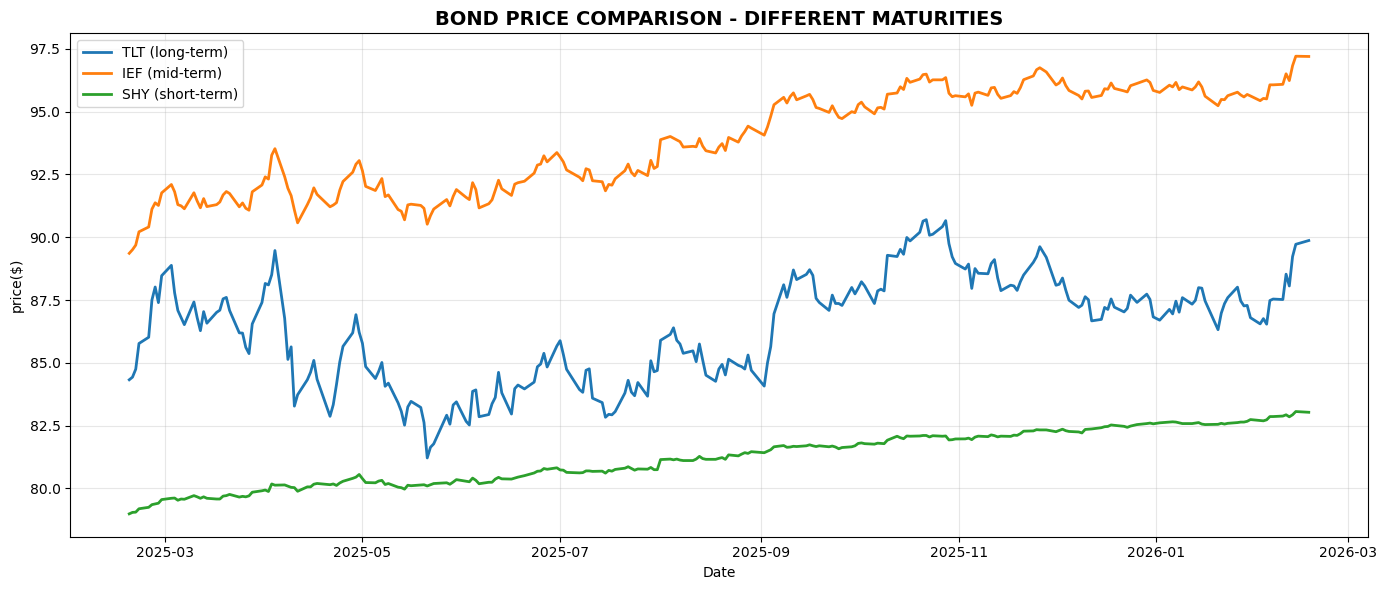

multi-bond visualisation complete!


In [9]:
# plot all three bonds on one chart 

plt.figure(figsize=(14,6))

plt.plot(all_bonds.index,all_bonds['TLT'],label='TLT (long-term)' , linewidth=2)
plt.plot(all_bonds.index,all_bonds['IEF'],label='IEF (mid-term)' , linewidth=2)
plt.plot(all_bonds.index,all_bonds['SHY'],label='SHY (short-term)' , linewidth=2)

plt.title('BOND PRICE COMPARISON - DIFFERENT MATURITIES',fontsize=14,fontweight='bold')
plt.xlabel('Date')
plt.ylabel('price($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("multi-bond visualisation complete!")

In [10]:
# save the bond data to csv for later use 

all_bonds.to_csv('bond_prices_raw.csv')
print(f"data saved! file: bond_prices_raw.csv")
print(f"total data points saved: {all_bonds.shape[0]*all_bonds.shape[1]}")

data saved! file: bond_prices_raw.csv
total data points saved: 753
